## Preparing Data For LSTM Model

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
AOI = 'iwm'

In [3]:

data_train = pd.read_csv(f'./p_data/{AOI}_train.csv')

data_train = data_train.drop(columns=[data_train.columns[0], 'Date'])

data_train

,fvx_close,tnx_close,vix_close,DFF,iwm_close,iwm_volume,Zscore,SMA100,SMA200,DeltaPrice
0,4.530,4.815,29.780001,5.40,45.150002,784600.0,-1.188500,47.961266,49.680359,-1.050003
1,4.493,4.791,30.959999,5.38,44.099998,625200.0,-1.817922,47.922141,49.662828,-0.674999
2,4.441,4.768,31.930000,5.14,43.424999,494800.0,-1.978552,47.879703,49.627391,-0.424999
3,4.382,4.708,32.840000,5.05,43.000000,1193000.0,-1.893632,47.841297,49.589516,1.125000
4,4.480,4.799,30.450001,5.04,44.125000,297200.0,-0.918849,47.791297,49.547016,0.599998
...,...,...,...,...,...,...,...,...,...,...
4212,2.251,2.485,9.900000,1.42,153.190002,13599400.0,1.032757,145.829100,142.295950,0.089996
4213,2.237,2.467,10.250000,1.42,153.279999,11949600.0,1.031901,145.958700,142.382100,-0.149994
4214,2.199,2.414,10.470000,1.42,153.130005,15949900.0,0.777235,146.096200,142.467100,0.599991
4215,2.234,2.432,10.180000,1.42,153.729996,10167300.0,1.173525,146.225400,142.554600,-1.269989


In [4]:
data_test = pd.read_csv(f'./p_data/{AOI}_test.csv')

data_test = data_test.drop(columns=[data_test.columns[0], 'Date'])

data_test

,fvx_close,tnx_close,vix_close,DFF,iwm_close,iwm_volume,Zscore,SMA100,SMA200,DeltaPrice
0,1.671,1.882,12.470000,1.55,165.779999,18297500.0,0.531372,155.5764,154.853299,-0.649994
1,1.586,1.788,14.020000,1.55,165.130005,19295600.0,-0.225306,155.7280,154.907399,0.220001
2,1.611,1.811,13.850000,1.55,165.350006,17150900.0,-0.097049,155.8926,154.966749,-0.550003
3,1.619,1.827,13.790000,1.55,164.800003,11817900.0,-1.073076,156.0434,155.017150,0.509995
4,1.665,1.874,13.450000,1.55,165.309998,13832400.0,-0.562264,156.2307,155.093050,0.199997
...,...,...,...,...,...,...,...,...,...,...
498,1.222,1.457,18.629999,0.08,220.279999,32442000.0,0.645366,224.4095,224.219900,1.759995
499,1.243,1.493,17.959999,0.08,222.039993,22114800.0,1.076908,224.4128,224.185200,2.080002
500,1.252,1.481,17.680000,0.08,224.119995,24196700.0,1.470603,224.4246,224.134300,-1.369995
501,1.245,1.481,17.540001,0.08,222.750000,22765884.0,0.956414,224.4847,224.086950,0.139999


In [5]:
window_size = 7

In [6]:
past_window = data_train.tail(window_size)

data_test = past_window.append(data_test, ignore_index=True)

In [7]:
scaler = MinMaxScaler(feature_range=(-1,1))
data_train = scaler.fit_transform(data_train)
data_test = scaler.fit_transform(data_test)

In [8]:
# data_train[i, 0] is most likely wrong zero should be whatever training column is (delta_price). Also, consider reording columns so that things make more sense.

In [9]:
X_train = []
Y_train = []

for i in range(window_size, data_train.shape[0]):
    X_train.append(data_train[i-window_size:i])
    Y_train.append(data_train[i, -1])


In [10]:
# print(data_train[0:window_size])

In [11]:
# print(data_train[window_size])

In [12]:
# print(data_train[7, -1])

In [13]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [14]:
X_train.shape, Y_train.shape

((4210, 7, 10), (4210,))

In [15]:
print(X_train)
print(Y_train)

[[[ 0.70188195  0.66578125 -0.42442832 ... -0.80621906 -0.77096302
   -0.04972387]
  [ 0.68605639  0.65418976 -0.39152263 ... -0.80693725 -0.77129703
    0.01933765]
  [ 0.66381514  0.64308145 -0.36447295 ... -0.80771625 -0.77197218
    0.06537819]
  ...
  [ 0.68049607  0.65805351 -0.40574455 ... -0.80933908 -0.77350349
    0.25414401]
  [ 0.69375533  0.68123648 -0.44506412 ... -0.81005613 -0.77421198
    0.20994548]
  [ 0.7596235   0.74692095 -0.50083657 ... -0.81070319 -0.77485141
   -0.07918909]]

 [[ 0.68605639  0.65418976 -0.39152263 ... -0.80693725 -0.77129703
    0.01933765]
  [ 0.66381514  0.64308145 -0.36447295 ... -0.80771625 -0.77197218
    0.06537819]
  [ 0.63857989  0.61410297 -0.33909649 ... -0.80842125 -0.77269378
    0.35082943]
  ...
  [ 0.69375533  0.68123648 -0.44506412 ... -0.81005613 -0.77421198
    0.20994548]
  [ 0.7596235   0.74692095 -0.50083657 ... -0.81070319 -0.77485141
   -0.07918909]
  [ 0.74679214  0.74112544 -0.45789182 ... -0.81151363 -0.77554288
    0.

## Training LSTM Model

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


2021-12-30 02:12:07.812170: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-30 02:12:07.812217: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [17]:
regressor = Sequential()

#R1
regressor.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

#R2
regressor.add(LSTM(units=60, activation='relu', return_sequences=True))
regressor.add(Dropout(0.3))

#R3
regressor.add(LSTM(units=80, activation='relu', return_sequences=True))
regressor.add(Dropout(0.4))

#R4
regressor.add(LSTM(units=120, activation='relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

2021-12-30 02:12:11.076986: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-30 02:12:11.077020: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-30 02:12:11.077047: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost): /proc/driver/nvidia/version does not exist
2021-12-30 02:12:11.077344: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 50)             12200     
                                                                 
 dropout (Dropout)           (None, 7, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 7, 60)             26640     
                                                                 
 dropout_1 (Dropout)         (None, 7, 60)             0         
                                                                 
 lstm_2 (LSTM)               (None, 7, 80)             45120     
                                                                 
 dropout_2 (Dropout)         (None, 7, 80)             0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [19]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [20]:
regressor.fit(X_train, Y_train, epochs=7, batch_size=10)

Epoch 1/7
421/421 [==============================] - 6s 10ms/step - loss: 0.0373
Epoch 2/7
421/421 [==============================] - 4s 10ms/step - loss: 0.0364
Epoch 3/7
421/421 [==============================] - 5s 11ms/step - loss: 0.0364
Epoch 4/7
421/421 [==============================] - 4s 10ms/step - loss: 0.0362
Epoch 5/7
421/421 [==============================] - 4s 10ms/step - loss: 0.0362
Epoch 6/7
421/421 [==============================] - 4s 10ms/step - loss: 0.0361
Epoch 7/7
421/421 [==============================] - 4s 10ms/step - loss: 0.0362


## Preparing Test Set For LSTM Prediction

In [21]:
X_test = []
Y_test = []

for i in range(window_size, data_test.shape[0]):
    X_test.append(data_test[i-window_size:i])
    Y_test.append(data_test[i, -1])

In [22]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [23]:
X_test.shape, Y_test.shape

((503, 7, 10), (503,))

## Predicting Outputs For Test Set

In [24]:
Y_pred = regressor.predict(X_test)

In [25]:
Y_test

array([ 2.16487065e-01,  2.86114531e-01,  2.24489534e-01,  3.09323280e-01,
        2.84513549e-01,  2.18887928e-01,  3.54142236e-01,  3.17326970e-01,
        3.32532028e-01,  4.41376845e-01,  2.31693344e-01,  1.56461829e-01,
        2.59703818e-01,  2.59703818e-01,  1.03641624e-01,  1.18046802e-01,
        3.77350985e-01,  1.93277095e-01,  2.68507389e-01, -3.60098904e-03,
        4.11765388e-01,  4.64585593e-01,  4.71788182e-01,  2.38094831e-01,
        1.04442726e-01,  3.42936581e-01,  3.60544945e-01,  3.60543723e-01,
        3.03721673e-01,  2.16485844e-01,  2.39695813e-01,  3.37334975e-01,
        3.01320810e-01,  1.31653320e-01, -1.34053572e-01, -1.92477825e-01,
        1.23649629e-01, -1.66866993e-01,  5.00203176e-02,  6.44657637e-01,
        2.20086222e-02,  6.05442729e-01, -1.18847293e-01,  3.48128173e-02,
       -8.55141629e-01,  5.94237074e-01, -4.15766012e-01, -8.44737686e-01,
        8.68747537e-01, -1.00000000e+00,  6.48659483e-01, -4.03761698e-01,
        5.80632388e-01,  

In [26]:
Y_pred

array([[0.15827549],
       [0.15821432],
       [0.15813948],
       [0.15805897],
       [0.15796143],
       [0.15781742],
       [0.15768161],
       [0.15748689],
       [0.15743235],
       [0.15742877],
       [0.15744372],
       [0.15751946],
       [0.1575955 ],
       [0.15768951],
       [0.15782003],
       [0.15787151],
       [0.15786687],
       [0.15778   ],
       [0.15754654],
       [0.15741204],
       [0.15730622],
       [0.15719546],
       [0.1570937 ],
       [0.15704854],
       [0.15706475],
       [0.15707193],
       [0.15713015],
       [0.15719372],
       [0.1572755 ],
       [0.15734865],
       [0.15736608],
       [0.15737538],
       [0.15741235],
       [0.1574592 ],
       [0.15750046],
       [0.15748897],
       [0.15744019],
       [0.15737206],
       [0.15728475],
       [0.15719353],
       [0.1570859 ],
       [0.15696637],
       [0.15691432],
       [0.15699121],
       [0.1570255 ],
       [0.15706325],
       [0.15702173],
       [0.156

In [27]:
scaler.scale_

array([9.72762677e-01, 1.00100102e+00, 2.73710131e-02, 1.28205128e+00,
       1.40193471e-02, 2.95950411e-08, 1.76543923e-01, 2.12568313e-02,
       2.42528310e-02, 8.00320196e-02])

In [28]:
scaler.scale_[-1]

0.08003201964653221

## Descaling Outputs

In [29]:
scale_factor = 1/scaler.scale_[-1]


In [30]:
scale_factor

12.494998931884759

In [31]:
Y_pred = Y_pred * scale_factor
Y_test = Y_test * scale_factor

In [32]:
print( Y_pred)

[[1.9776521]
 [1.9768877]
 [1.9759526]
 [1.9749466]
 [1.9737278]
 [1.9719285]
 [1.9702317]
 [1.9677985]
 [1.9671171]
 [1.9670724]
 [1.967259 ]
 [1.9682055]
 [1.9691556]
 [1.9703302]
 [1.9719611]
 [1.9726044]
 [1.9725463]
 [1.971461 ]
 [1.9685438]
 [1.9668633]
 [1.9655411]
 [1.9641571]
 [1.9628856]
 [1.9623213]
 [1.9625239]
 [1.9626136]
 [1.9633411]
 [1.9641354]
 [1.9651572]
 [1.9660711]
 [1.966289 ]
 [1.9664052]
 [1.9668671]
 [1.9674525]
 [1.9679681]
 [1.9678246]
 [1.967215 ]
 [1.9663637]
 [1.9652728]
 [1.9641329]
 [1.9627881]
 [1.9612947]
 [1.9606444]
 [1.9616051]
 [1.9620335]
 [1.9625051]
 [1.9619863]
 [1.9603239]
 [1.9614776]
 [1.9629544]
 [1.9635694]
 [1.9642953]
 [1.9617052]
 [1.9619017]
 [1.9611582]
 [1.9620302]
 [1.9612807]
 [1.9613242]
 [1.961017 ]
 [1.9617275]
 [1.9608979]
 [1.9612579]
 [1.9612201]
 [1.9598963]
 [1.9592415]
 [1.957831 ]
 [1.9578351]
 [1.957617 ]
 [1.958454 ]
 [1.9598571]
 [1.9609563]
 [1.9620342]
 [1.9619333]
 [1.9619906]
 [1.9613798]
 [1.960567 ]
 [1.9606249]

In [33]:
Y_pred.shape, Y_test.shape

((503, 1), (503,))

In [34]:
Y_test

array([ 2.70500565e+00,  3.57500076e+00,  2.80499649e+00,  3.86499405e+00,
        3.55499649e+00,  2.73500443e+00,  4.42500687e+00,  3.96500015e+00,
        4.15498734e+00,  5.51500320e+00,  2.89500809e+00,  1.95499039e+00,
        3.24499893e+00,  3.24499893e+00,  1.29500198e+00,  1.47499466e+00,
        4.71500015e+00,  2.41499710e+00,  3.35499954e+00, -4.49943542e-02,
        5.14500809e+00,  5.80499649e+00,  5.89499283e+00,  2.97499466e+00,
        1.30501175e+00,  4.28499222e+00,  4.50500870e+00,  4.50499344e+00,
        3.79500198e+00,  2.70499039e+00,  2.99499893e+00,  4.21500015e+00,
        3.76500320e+00,  1.64500809e+00, -1.67499924e+00, -2.40501022e+00,
        1.54500198e+00, -2.08500290e+00,  6.25003815e-01,  8.05499649e+00,
        2.74997711e-01,  7.56500626e+00, -1.48499680e+00,  4.34986115e-01,
       -1.06849937e+01,  7.42499161e+00, -5.19499588e+00, -1.05549965e+01,
        1.08549995e+01, -1.24949989e+01,  8.10499954e+00, -5.04500198e+00,
        7.25500107e+00,  

In [35]:
Y_pred

array([[1.9776521],
       [1.9768877],
       [1.9759526],
       [1.9749466],
       [1.9737278],
       [1.9719285],
       [1.9702317],
       [1.9677985],
       [1.9671171],
       [1.9670724],
       [1.967259 ],
       [1.9682055],
       [1.9691556],
       [1.9703302],
       [1.9719611],
       [1.9726044],
       [1.9725463],
       [1.971461 ],
       [1.9685438],
       [1.9668633],
       [1.9655411],
       [1.9641571],
       [1.9628856],
       [1.9623213],
       [1.9625239],
       [1.9626136],
       [1.9633411],
       [1.9641354],
       [1.9651572],
       [1.9660711],
       [1.966289 ],
       [1.9664052],
       [1.9668671],
       [1.9674525],
       [1.9679681],
       [1.9678246],
       [1.967215 ],
       [1.9663637],
       [1.9652728],
       [1.9641329],
       [1.9627881],
       [1.9612947],
       [1.9606444],
       [1.9616051],
       [1.9620335],
       [1.9625051],
       [1.9619863],
       [1.9603239],
       [1.9614776],
       [1.9629544],


In [36]:
og_data_test = pd.read_csv(f'./p_data/{AOI}_test.csv')

og_data_test = og_data_test.drop(columns=[og_data_test.columns[0], 'Date'])

close_price = og_data_test[f'{AOI}_close'] 


In [37]:
pred_list = []
price_list = []

count = 0
for each in close_price:

    prediction = each + Y_pred [count]
    price = each + Y_test [count]
    
    pred_list.append(prediction)
    price_list.append(price)
    
    count = count + 1
    

In [38]:
pred_list

[array([167.75764], dtype=float32),
 array([167.10689], dtype=float32),
 array([167.32596], dtype=float32),
 array([166.77495], dtype=float32),
 array([167.28372], dtype=float32),
 array([167.48192], dtype=float32),
 array([166.86023], dtype=float32),
 array([167.92781], dtype=float32),
 array([168.53712], dtype=float32),
 array([169.33707], dtype=float32),
 array([171.49725], dtype=float32),
 array([171.03821], dtype=float32),
 array([169.63916], dtype=float32),
 array([169.53033], dtype=float32),
 array([169.42195], dtype=float32),
 array([167.36261], dtype=float32),
 array([165.48254], dtype=float32),
 array([166.84146], dtype=float32),
 array([165.89853], dtype=float32),
 array([165.89685], dtype=float32),
 array([162.49554], dtype=float32),
 array([164.28416], dtype=float32),
 array([166.7329], dtype=float32),
 array([169.27232], dtype=float32),
 array([168.89252], dtype=float32),
 array([166.84262], dtype=float32),
 array([167.77335], dtype=float32),
 array([168.92415], dtype=flo

In [39]:
price_list

[168.48500442504883,
 168.70500564575195,
 168.15500259399414,
 168.66499710083008,
 168.86499404907227,
 168.24499893188477,
 169.31500625610352,
 169.92500686645508,
 170.72499465942383,
 172.8849983215332,
 172.42500686645508,
 171.02499771118164,
 170.91499710083008,
 170.80499649047852,
 168.74499893188477,
 166.86499404907227,
 168.22499465942383,
 167.28499221801758,
 167.28499221801758,
 163.8849983215332,
 165.67500686645508,
 168.12500381469727,
 170.66499710083008,
 170.28499221801758,
 168.23500442504883,
 169.16499710083008,
 170.31500625610352,
 171.4650001525879,
 171.90500259399414,
 171.2549934387207,
 170.89499282836914,
 171.7549934387207,
 172.16499710083008,
 170.45500564575195,
 165.42500686645508,
 159.66499710083008,
 157.85499954223633,
 152.41499710083008,
 149.68500137329102,
 154.3849983215332,
 151.30499649047852,
 155.5150032043457,
 150.67500686645508,
 147.7549934387207,
 133.7150001525879,
 137.78499221801758,
 129.23499679565427,
 115.32500076293944,
 

## Visualization & Evaluation

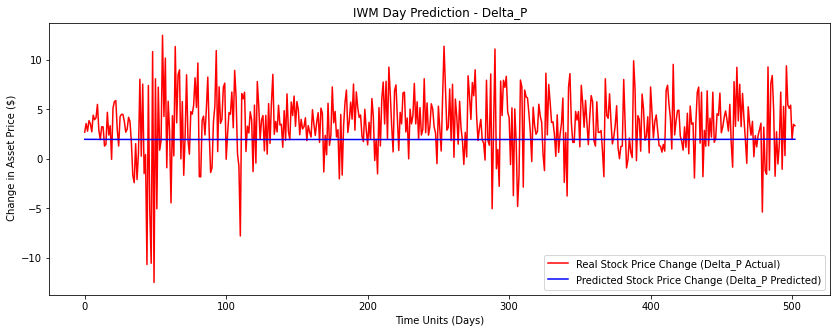

In [40]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Stock Price Change (Delta_P Actual)')
plt.plot(Y_pred, color = 'blue', label = 'Predicted Stock Price Change (Delta_P Predicted)')
plt.title(f'{AOI.upper()} Day Prediction - Delta_P')
plt.xlabel('Time Units (Days)')
plt.ylabel(' Change in Asset Price ($)')
plt.legend()
plt.show()

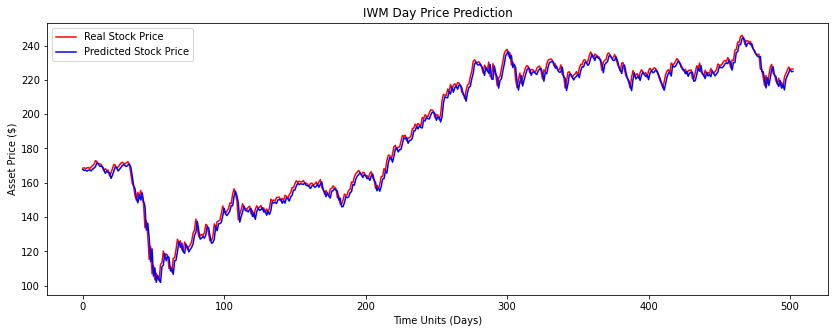

In [41]:
plt.figure(figsize=(14,5))
plt.plot(price_list, color = 'red', label = 'Real Stock Price')
plt.plot(pred_list, color = 'blue', label = 'Predicted Stock Price')
plt.title(f'{AOI.upper()} Day Price Prediction')
plt.xlabel('Time Units (Days)')
plt.ylabel('Asset Price ($)')
plt.legend()
plt.show()

In [42]:
diff_sq_sum = 0
for i in range(0, len(price_list)):
    diff = price_list[i] - pred_list[i]
    diff_sq = diff * diff
    diff_sq_sum = diff_sq_sum + diff_sq
    
RMSE = math.sqrt(diff_sq_sum/len(price_list))
    
print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 3.5441148412021577


In [43]:
diff_sum = 0
for i in range(0, len(price_list)):
    diff = abs((price_list[i] - pred_list[i]) / price_list [i])
    diff_sum = diff_sum + diff
    
MAPE = diff_sum[0]/len(price_list)
    
print("Mean Absolue Percentage Error (MAPE):", MAPE)

Mean Absolue Percentage Error (MAPE): 0.015736740104720797


In [44]:
dir_match_count = 0
price_diff = 0
pred_diff = 0
for i in range(1, len(price_list)):
    
    price_diff = price_list [i] - price_list[i - 1]
    pred_diff = pred_list[i] - pred_list[i - 1]
    
    if np.sign(price_diff) == np.sign(pred_diff):
        dir_match_count = dir_match_count + 1

correct_dir_perc = dir_match_count/(len(price_list) - 1)
        
print("Correct Direction Prediction Accuracy:", correct_dir_perc)

Correct Direction Prediction Accuracy: 0.48804780876494025
